# < Data Collection & Basic Exploration 수집 및 간단한 탐색>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_predict

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1. 데이터 불러오기

In [59]:
padua_data = pd.read_csv('./data/kideny_PADUA_upload.csv')
renal_data = pd.read_csv('./data/kideny_RENAL_upload.csv')
treat_data = pd.read_csv('./data/kidney_treat_upload.csv')

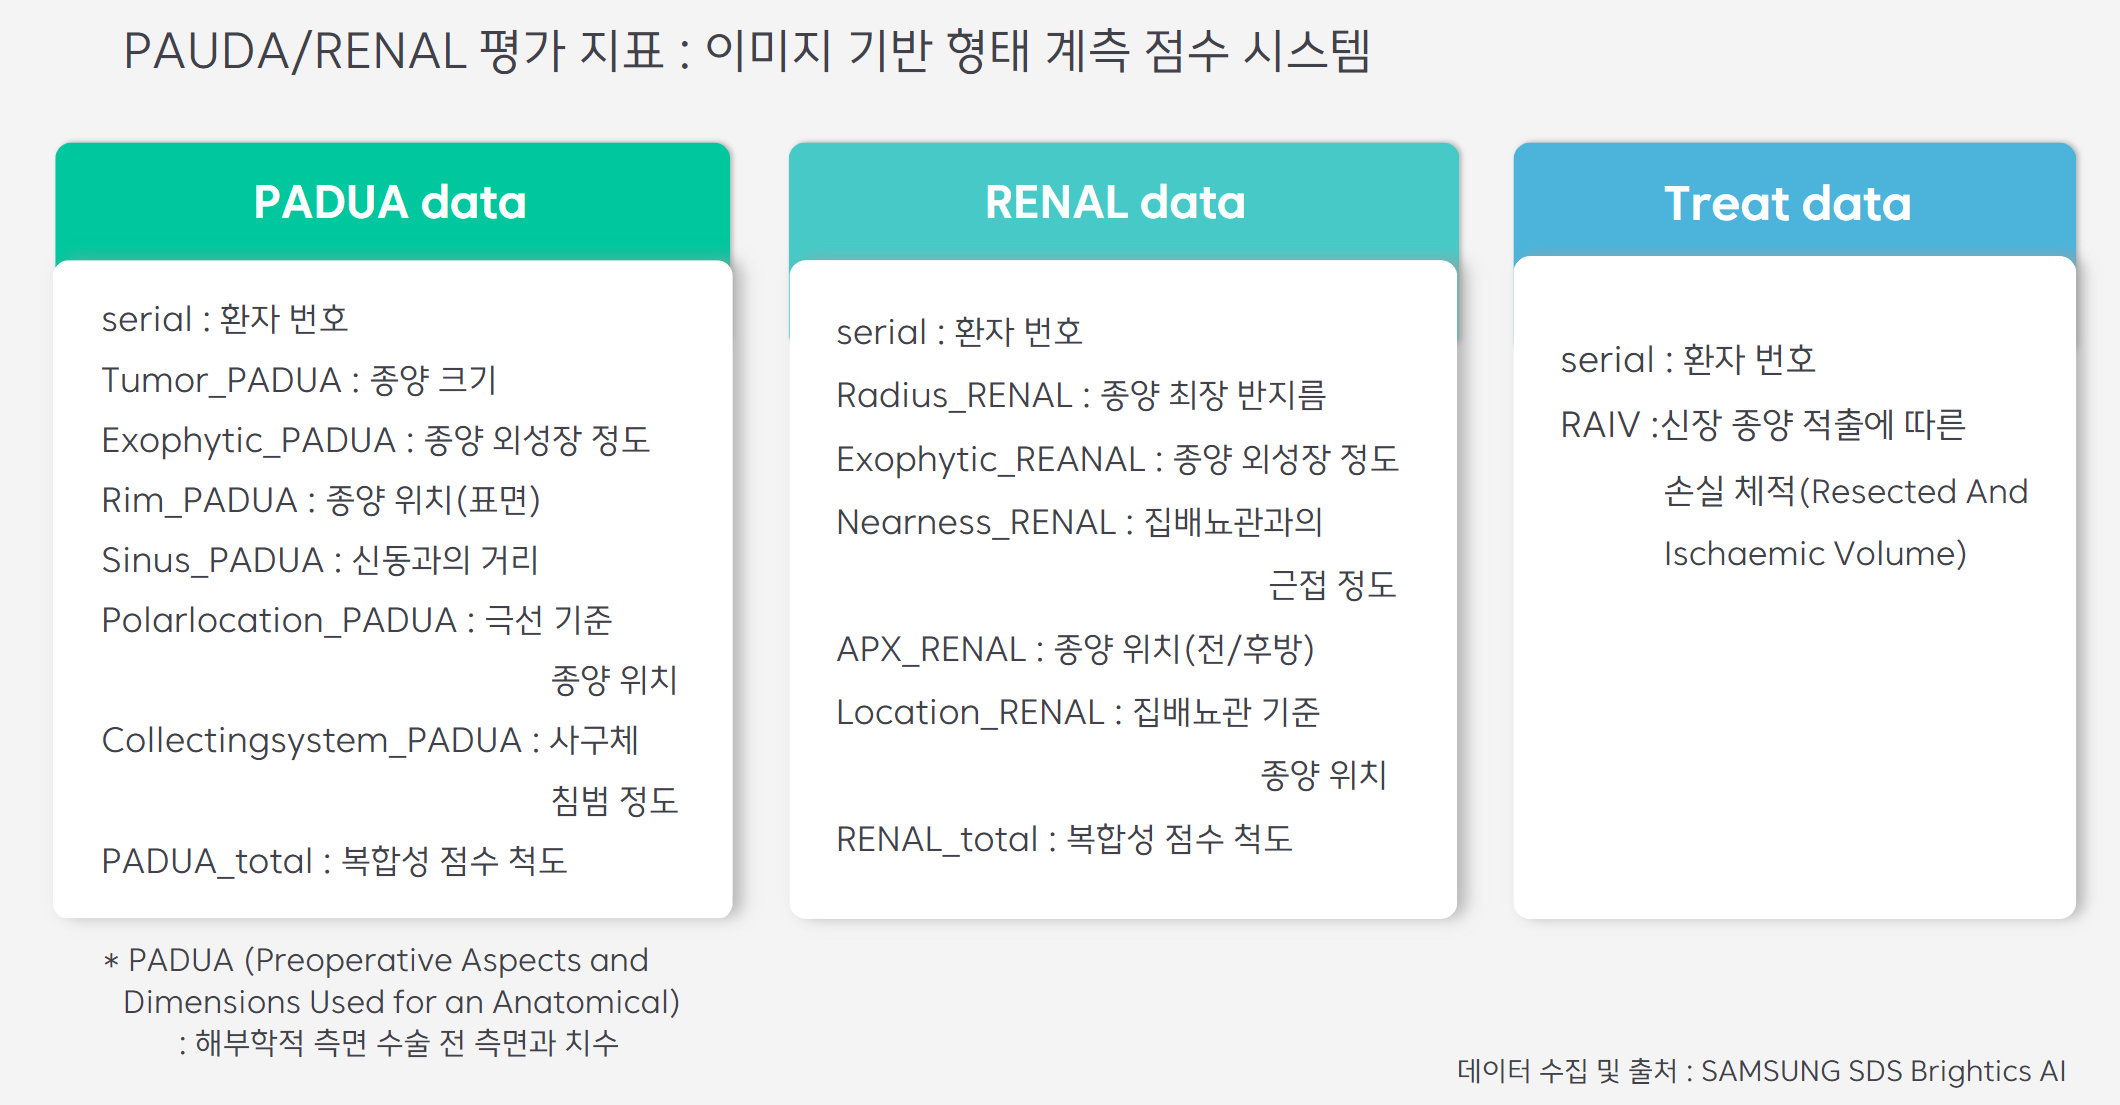

In [60]:
Image(filename='./data/데이터정보.png') 

### 2. 간단한 데이터 정리 

* treat_data 에 변수가 <serial\tRAIV_1> 이라는 하나로 잡혀서 2개의 컬럼으로 만들어줌

In [61]:
treat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   serial  400 non-null    int64  
 1   RAIV_1  397 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


### 3. padua 데이터, renal 데이터, treat 데이터 serial 번호 기준으로 merge

In [62]:
merged_data = pd.merge(padua_data, renal_data, on='serial')
merged_data_result = pd.merge(merged_data, treat_data, on='serial')

In [63]:
merged_data_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  400 non-null    int64  
 1   Tumor_PADUA             396 non-null    float64
 2   Exophytic_PADUA         395 non-null    float64
 3   Rim_PADUA               395 non-null    float64
 4   Sinus_PADUA             395 non-null    float64
 5   Polarlocation_PADUA     395 non-null    float64
 6   Collectingsystem_PADUA  395 non-null    float64
 7   PADUA_total             400 non-null    int64  
 8   Radius_RENAL            396 non-null    float64
 9   Exophytic_RENAL         395 non-null    float64
 10  Nearness_RENAL          395 non-null    float64
 11  APX_RENAL               394 non-null    float64
 12  Location_RENAL          395 non-null    float64
 13  RENAL_total             400 non-null    int64  
 14  RAIV_1                  397 non-null    fl

#### 4. 결측치 제거
##### (1) 결측치 제외한 모든 feature값: 0
- 결측치를 0 또는 평균값으로 대체하기엔 RAIV 제외 모든 feature들 정수화된 범주형 변수 값
##### (2) RAIV 값 0
- 모델링 후 예측할 예정

In [64]:
merged_data_result = merged_data_result.dropna()

In [65]:
# 결측치 확인
merged_data_result.isnull().sum()

serial                    0
Tumor_PADUA               0
Exophytic_PADUA           0
Rim_PADUA                 0
Sinus_PADUA               0
Polarlocation_PADUA       0
Collectingsystem_PADUA    0
PADUA_total               0
Radius_RENAL              0
Exophytic_RENAL           0
Nearness_RENAL            0
APX_RENAL                 0
Location_RENAL            0
RENAL_total               0
RAIV_1                    0
dtype: int64

#### 5. 중복 컬럼 삭제 - Tumor_PADUA , Exophytic_PADUA & 컬럼명 변경
        Raiv_1 -> Raiv
        Radus_RENAL -> Radius_RENAL_PADUA
        Exophytic_RENAL -> Exophytic_RENAL_PADUA

In [66]:
merged_data_result.drop(['Tumor_PADUA', 'Exophytic_PADUA'], axis=1, inplace=True)

In [67]:
merged_data_result.rename(columns={'RAIV_1': 'RAIV',
                            'Radius_RENAL': 'Radius_RENAL_PADUA',
                            'Exophytic_RENAL': 'Exophytic_RENAL_PADUA'}, inplace=True)

#### 6. 간단한 데이터 탐색

- serial(환자 번호)와 RAIV값을 제외한 나머지 모든 컬럼은 이미지 기반 형태 계측 점수 시스템으로, 카테고리형(명목형,순서형 혼합) 데이터 유형
- RAIV값이 왼쪽으로 치우친 형태
- 피어슨 상관관계 확인 결과 RAIV값과 뚜렷한 상관관계가 있는 컬럼을 찾을 수 없음

In [68]:
merged_data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  389 non-null    int64  
 1   Rim_PADUA               389 non-null    float64
 2   Sinus_PADUA             389 non-null    float64
 3   Polarlocation_PADUA     389 non-null    float64
 4   Collectingsystem_PADUA  389 non-null    float64
 5   PADUA_total             389 non-null    int64  
 6   Radius_RENAL_PADUA      389 non-null    float64
 7   Exophytic_RENAL_PADUA   389 non-null    float64
 8   Nearness_RENAL          389 non-null    float64
 9   APX_RENAL               389 non-null    float64
 10  Location_RENAL          389 non-null    float64
 11  RENAL_total             389 non-null    int64  
 12  RAIV                    389 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 42.5 KB


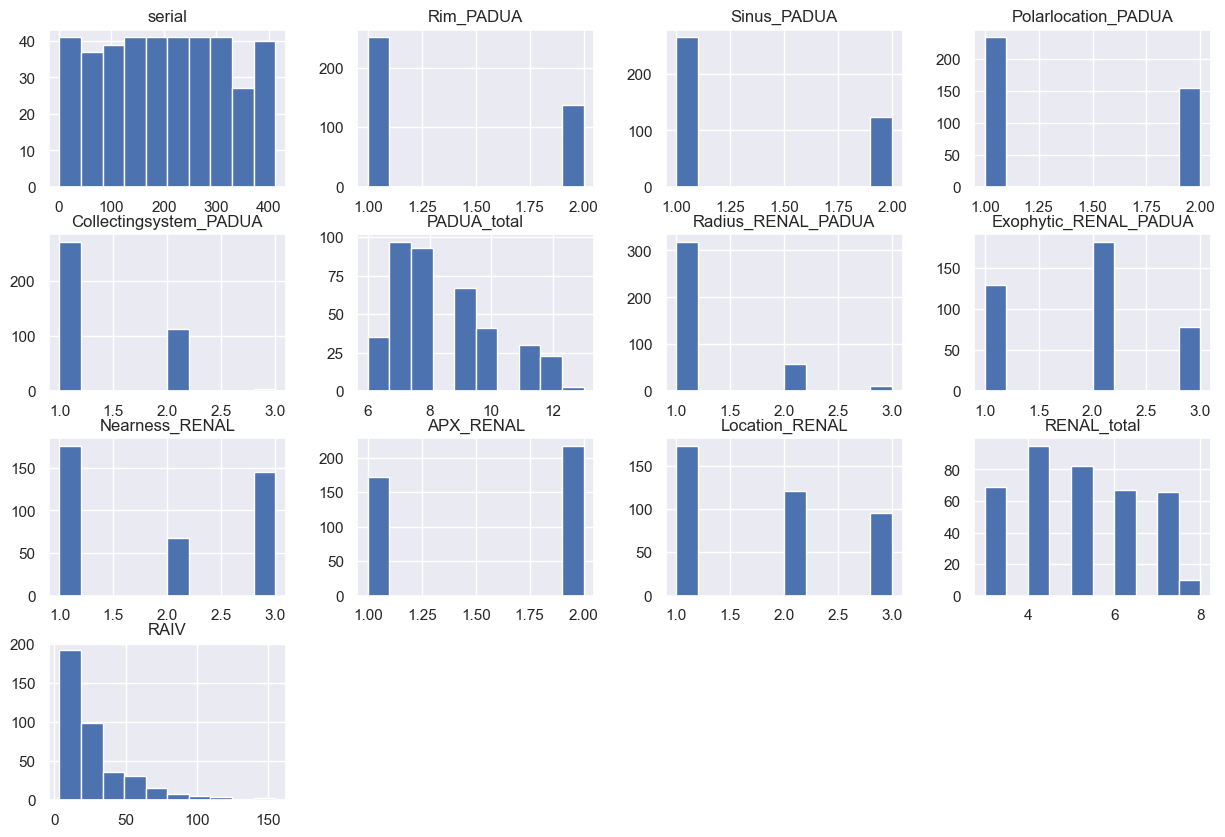

In [69]:
# 분포확인

merged_data_result.hist(bins=10, figsize=(15,10))
plt.show()

In [70]:
# Raiv에 대한 histogram

fig=px.histogram(merged_data_result, x='RAIV')
fig.show()

<Axes: >

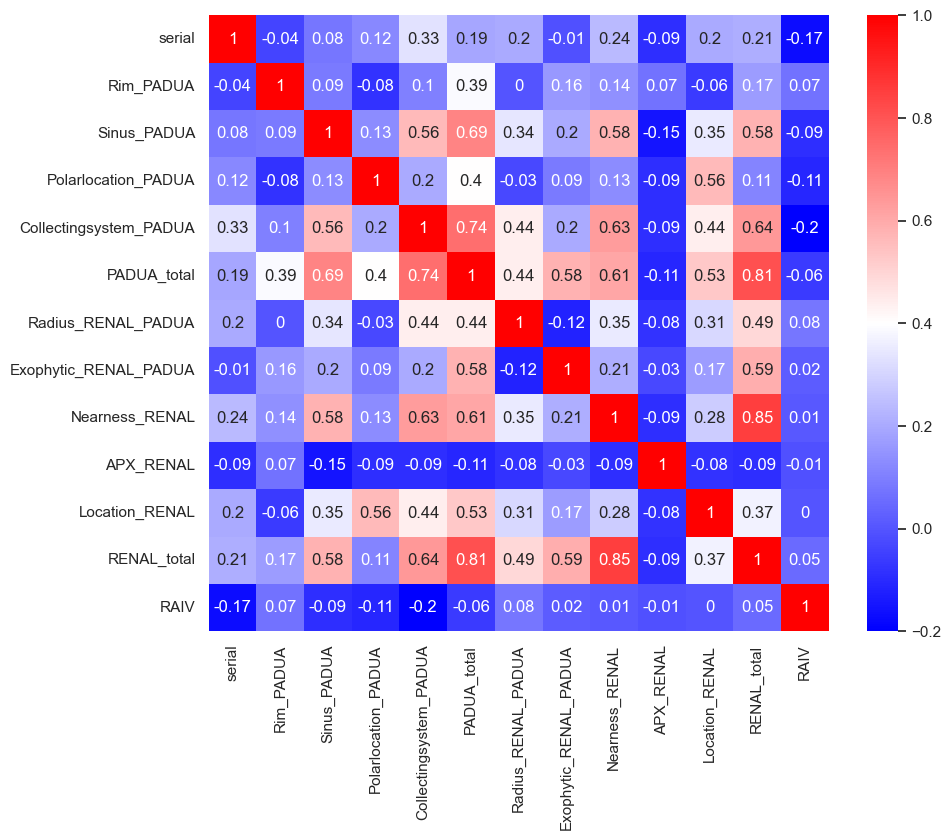

In [71]:
# 피어슨 함수로 상관관계 확인
corr = merged_data_result.corr().round(2)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr, annot=True, cmap='bwr')

---

# < EMA(Exploratory Model Analysis) >
- 본격적인 데이터 분석 전 EMA(모델의 초기 구축 및 성능 평가)을 통해 데이터의 전반적인 구조와 특성을 파악
- LinearRegression, DecisionTree,  RandomForest 모델 적용
- 모델 평가: MAE

### 1. 데이터 나누기 train_test_split

In [72]:
from sklearn.model_selection import train_test_split

X = merged_data_result.drop('RAIV', axis=1)  # 'RAIV_1' 열을 제외한 모든 열 선택
y = merged_data_result['RAIV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### 2. 모델링

In [73]:
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor(max_depth=3)))
models.append(('RandomForestRegressor',RandomForestRegressor()))

In [74]:
tr_result_mae = []
test_result_mae = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_train, y_train)
    names.append(name)

    # 예측
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)

    # MAE 계산
    mae_tr = mean_absolute_error(y_train, pred_tr)
    mae_test = mean_absolute_error(y_test, pred_test)

    # 결과를 리스트에 추가
    tr_result_mae.append(mae_tr)
    test_result_mae.append(mae_test)

# 결과를 DataFrame으로 정리
result_pd = pd.DataFrame({
    'Model': names,
    'train MAE': tr_result_mae,
    'test MAE': test_result_mae
})

result_pd

,Model,train MAE,test MAE
0,LinearRegression,15.845610,17.944052
1,DecisionTreeRegressor,12.400717,16.060734
2,RandomForestRegressor,5.085354,15.844897


- RandomForestRegressor가 train데이터에 과적합되어 있음
- test 성능평가(MAE) 비교 결과 RandomForestRegressor 모델에서 성능이 좋음

---

## 군집화
### 3.  최적의 군집 수 찾기

In [75]:
cluster_range = range(2, 11)

optimal_clusters = 0
max_silhouette_score = -1

for n_clusters in cluster_range:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=13)
    
    kmeans.fit(X_train)
    
    clusters = kmeans.predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, clusters)
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_clusters = n_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_clusters)

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by set

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by set

Optimal number of clusters: 2


In [76]:
kmeans = KMeans(n_clusters=2, random_state=13)
kmeans.fit(X_train)

tr_cluster = kmeans.predict(X_train)          # train 데이터 군집화
test_cluster = kmeans.predict(X_test)         # test 데이터 군집화

print('train_cluster_labels :', tr_cluster)
print('test_cluster_labels : ', test_cluster)

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



train_cluster_labels : [0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1]
test_cluster_labels :  [1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0
 1 0 1 1]


In [77]:
# 군집 중심 좌표
kmeans.cluster_centers_

# 군집 중심 좌표를 DataFrame으로 변환
cluster_center_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

cluster_center_df

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total
0,106.544304,1.354430,1.335443,1.348101,1.170886,8.139241,1.094937,1.835443,1.803797,1.563291,1.607595,4.71519
1,302.176471,1.339869,1.339869,1.483660,1.464052,8.810458,1.333333,1.849673,2.091503,1.516340,2.006536,5.27451


### 군집 집단 나누기

In [78]:
# 군집0
X_tr_0 = X_train[tr_cluster == 0]
X_test_0 = X_test[test_cluster == 0]
y_tr_0 = y_train[tr_cluster == 0]
y_test_0 = y_test[test_cluster == 0]

#군집1
X_tr_1 = X_train[tr_cluster == 1]
X_test_1 = X_test[test_cluster == 1]
y_tr_1 = y_train[tr_cluster == 1]
y_test_1 = y_test[test_cluster == 1]

### 3-1. 군집0 모델링

In [79]:
tr_result_mae = []
test_result_mae = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_tr_0, y_tr_0)
    names.append(name)

    # 예측
    pred_tr = model.predict(X_tr_0)
    pred_test = model.predict(X_test_0)

    # MAE 계산
    mae_tr = mean_absolute_error(y_tr_0, pred_tr)
    mae_test = mean_absolute_error(y_test_0, pred_test)

    # 결과를 리스트에 추가
    tr_result_mae.append(mae_tr)
    test_result_mae.append(mae_test)

# 결과를 DataFrame으로 정리
result_pd_0 = pd.DataFrame({
    'Model': names,
    'train MAE_0': tr_result_mae,
    'test MAE_0': test_result_mae
})

result_pd_0

,Model,train MAE_0,test MAE_0
0,LinearRegression,13.779297,20.842786
1,DecisionTreeRegressor,12.166314,18.666737
2,RandomForestRegressor,5.333253,18.890897


### 3-2. 군집1 모델링

In [80]:
tr_result_mae = []
test_result_mae = []
names = []

for name, model in models:
    # 모델 훈련
    model.fit(X_tr_1, y_tr_1)
    names.append(name)

    # 예측
    pred_tr = model.predict(X_tr_1)
    pred_test = model.predict(X_test_1)

    # MAE 계산
    mae_tr = mean_absolute_error(y_tr_1, pred_tr)
    mae_test = mean_absolute_error(y_test_1, pred_test)

    # 결과를 리스트에 추가
    tr_result_mae.append(mae_tr)
    test_result_mae.append(mae_test)

# 결과를 DataFrame으로 정리
result_pd_1 = pd.DataFrame({
    'Model': names,
    'train MAE_1': tr_result_mae,
    'test MAE_1': test_result_mae
})

result_pd_1

,Model,train MAE_1,test MAE_1
0,LinearRegression,13.487899,13.164005
1,DecisionTreeRegressor,9.916869,13.163261
2,RandomForestRegressor,4.821451,12.997897


# < 결론 Conclusion >

In [81]:
result_data = pd.merge(result_pd, result_pd_0, on='Model')
merged_result_data = pd.merge(result_data, result_pd_1, on='Model')
merged_result_data

,Model,train MAE,test MAE,train MAE_0,test MAE_0,train MAE_1,test MAE_1
0,LinearRegression,15.845610,17.944052,13.779297,20.842786,13.487899,13.164005
1,DecisionTreeRegressor,12.400717,16.060734,12.166314,18.666737,9.916869,13.163261
2,RandomForestRegressor,5.085354,15.844897,5.333253,18.890897,4.821451,12.997897


### 결과: 군집화하지 않은 것과 군집화를 한 경우를 비교
- 군집0는 성능이 더 안좋아졌으나 군집1의 경우 성능이 더 좋아진 것을 확인
### -> 본격적인 프로젝트 진행시 군집화를 진행하기로 함